# NLTK Complete Guide - Section 13: Sentiment Analysis

## What is Sentiment Analysis?

**Sentiment Analysis** (also called Opinion Mining) is a Natural Language Processing (NLP) technique used to identify and extract subjective information from text. It determines whether a piece of text expresses a **positive**, **negative**, or **neutral** sentiment.

### Why is Sentiment Analysis Important?

| Use Case | Description |
|----------|-------------|
| **Brand Monitoring** | Track public perception of products/services on social media |
| **Customer Feedback** | Analyze reviews to understand customer satisfaction |
| **Market Research** | Gauge public opinion about competitors and market trends |
| **Political Analysis** | Measure public sentiment toward policies or candidates |
| **Stock Market** | Predict market movements based on news sentiment |

### Approaches to Sentiment Analysis

1. **Lexicon-Based** (Rule-based): Uses predefined dictionaries of words with sentiment scores
   - Pros: No training required, interpretable, works out-of-the-box
   - Cons: May miss context, doesn't handle sarcasm well
   
2. **Machine Learning-Based**: Trains classifiers on labeled data
   - Pros: Can learn domain-specific patterns, handles context better
   - Cons: Requires labeled training data

### What This Notebook Covers

| Topic | Description |
|-------|-------------|
| **VADER** | Valence Aware Dictionary for social media sentiment |
| **SentiWordNet** | WordNet-based sentiment lexicon |
| **Custom Analyzer** | Building your own sentiment analysis class |
| **Practical Applications** | Real-world review analysis with visualization |

In [1]:
import nltk

nltk.download('vader_lexicon', quiet=True)
nltk.download('sentiwordnet', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk import pos_tag

### Understanding the Imports

| Import | Purpose |
|--------|---------|
| `SentimentIntensityAnalyzer` | VADER sentiment analyzer - the main tool for social media text |
| `sentiwordnet` | Sentiment scores for WordNet synsets (word senses) |
| `wordnet` | English lexical database - used to look up word meanings |
| `word_tokenize` | Splits text into individual words (tokens) |
| `pos_tag` | Identifies parts of speech (noun, verb, adjective, etc.) |

## 13.1 VADER Sentiment Analyzer

### What is VADER?

**VADER** (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool specifically designed for **social media text**. It was developed by C.J. Hutto and Eric Gilbert at Georgia Tech.

### Why VADER is Special

Unlike traditional sentiment lexicons, VADER is specifically attuned to sentiments expressed in social media. It understands:

| Feature | Description | Example |
|---------|-------------|---------|
| **Emojis** | Recognizes sentiment in emoticons | 😊 = positive, 😢 = negative |
| **Slang** | Understands informal language | "sux" = negative |
| **Capitalization** | CAPS indicate emphasis | "GREAT" is stronger than "great" |
| **Punctuation** | Exclamation marks increase intensity | "Good!" vs "Good" |
| **Degree Modifiers** | Words that change intensity | "very good" vs "slightly good" |
| **Negation** | Handles "not", "isn't", etc. | "not good" = negative |
| **Conjunctions** | "but" shifts sentiment weight | "It's good but expensive" |

### Key Advantages

✅ **No training required** - Works immediately out of the box  
✅ **Fast and efficient** - Perfect for real-time analysis  
✅ **Handles modern text** - Emojis, slang, social media conventions  
✅ **Validated accuracy** - Outperforms human raters in many cases

In [2]:
# Initialize VADER Sentiment Intensity Analyzer
# This creates an instance of the analyzer that we'll use throughout
sia = SentimentIntensityAnalyzer()

# Analyze a simple positive sentence
text = "I love this product! It's absolutely amazing."

# polarity_scores() returns a dictionary with 4 sentiment metrics
scores = sia.polarity_scores(text)

print(f"Text: {text}")
print(f"\nRaw Scores Dictionary: {scores}")
print(f"\nBreakdown:")
print(f"  • Negative component: {scores['neg']:.3f} ({scores['neg']*100:.1f}%)")
print(f"  • Neutral component:  {scores['neu']:.3f} ({scores['neu']*100:.1f}%)")
print(f"  • Positive component: {scores['pos']:.3f} ({scores['pos']*100:.1f}%)")
print(f"  • Compound score:     {scores['compound']:.3f}")

Text: I love this product! It's absolutely amazing.

Raw Scores Dictionary: {'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.862}

Breakdown:
  • Negative component: 0.000 (0.0%)
  • Neutral component:  0.318 (31.8%)
  • Positive component: 0.682 (68.2%)
  • Compound score:     0.862


In [3]:
# Understanding VADER's Scoring System
print("=" * 60)
print("UNDERSTANDING VADER SCORES")
print("=" * 60)

print("\n📊 THE FOUR SCORES EXPLAINED:")
print("-" * 60)

print("""
┌─────────────────────────────────────────────────────────────┐
│  SCORE     │  RANGE    │  MEANING                           │
├─────────────────────────────────────────────────────────────┤
│  neg       │  0 to 1   │  Proportion of text that is        │
│            │           │  negative (negative emotion ratio)  │
├─────────────────────────────────────────────────────────────┤
│  neu       │  0 to 1   │  Proportion of text that is        │
│            │           │  neutral (no strong emotion)        │
├─────────────────────────────────────────────────────────────┤
│  pos       │  0 to 1   │  Proportion of text that is        │
│            │           │  positive (positive emotion ratio)  │
├─────────────────────────────────────────────────────────────┤
│  compound  │  -1 to 1  │  Overall sentiment (normalized,    │
│            │           │  weighted composite score)          │
└─────────────────────────────────────────────────────────────┘

💡 NOTE: neg + neu + pos = 1.0 (they sum to 100%)
""")

print("\n🎯 COMPOUND SCORE INTERPRETATION (Standard Thresholds):")
print("-" * 60)
print("""
  • compound >= 0.05  →  POSITIVE sentiment 😊
  • compound <= -0.05 →  NEGATIVE sentiment 😞
  • -0.05 < compound < 0.05 → NEUTRAL sentiment 😐
  
  The compound score is most useful for single-metric classification!
""")

UNDERSTANDING VADER SCORES

📊 THE FOUR SCORES EXPLAINED:
------------------------------------------------------------

┌─────────────────────────────────────────────────────────────┐
│  SCORE     │  RANGE    │  MEANING                           │
├─────────────────────────────────────────────────────────────┤
│  neg       │  0 to 1   │  Proportion of text that is        │
│            │           │  negative (negative emotion ratio)  │
├─────────────────────────────────────────────────────────────┤
│  neu       │  0 to 1   │  Proportion of text that is        │
│            │           │  neutral (no strong emotion)        │
├─────────────────────────────────────────────────────────────┤
│  pos       │  0 to 1   │  Proportion of text that is        │
│            │           │  positive (positive emotion ratio)  │
├─────────────────────────────────────────────────────────────┤
│  compound  │  -1 to 1  │  Overall sentiment (normalized,    │
│            │           │  weighted composite

### Testing VADER on Various Sentiments

Let's see how VADER performs on different types of text - positive, negative, neutral, and mixed sentiments:

In [4]:
# Test various sentiments
sentences = [
    "I love this movie! It's fantastic!",
    "This is the worst experience ever.",
    "The weather is okay today.",
    "I'm not happy with the service.",
    "This product is not bad at all.",
    "AMAZING!!! Best purchase EVER!!! 😍",
    "meh, it's whatever...",
    "The food was good but the service was terrible.",
]

print("Sentiment Analysis Results")
print("=" * 70)

for sent in sentences:
    scores = sia.polarity_scores(sent)
    compound = scores['compound']
    
    if compound >= 0.05:
        sentiment = "POSITIVE 😊"
    elif compound <= -0.05:
        sentiment = "NEGATIVE 😞"
    else:
        sentiment = "NEUTRAL 😐"
    
    print(f"\n{sent}")
    print(f"  Compound: {compound:>6.3f} → {sentiment}")

Sentiment Analysis Results

I love this movie! It's fantastic!
  Compound:  0.855 → POSITIVE 😊

This is the worst experience ever.
  Compound: -0.625 → NEGATIVE 😞

The weather is okay today.
  Compound:  0.226 → POSITIVE 😊

I'm not happy with the service.
  Compound: -0.459 → NEGATIVE 😞

This product is not bad at all.
  Compound:  0.431 → POSITIVE 😊

AMAZING!!! Best purchase EVER!!! 😍
  Compound:  0.898 → POSITIVE 😊

meh, it's whatever...
  Compound: -0.077 → NEGATIVE 😞

The food was good but the service was terrible.
  Compound: -0.494 → NEGATIVE 😞


## 13.2 VADER Handles Special Cases

One of VADER's greatest strengths is its ability to handle the **nuances of real-world text**. Unlike simple word-counting approaches, VADER applies sophisticated rules to understand context and emphasis.

### Heuristics VADER Uses:

1. **Punctuation** - Exclamation marks boost intensity
2. **Capitalization** - ALL CAPS indicates shouting/emphasis  
3. **Degree modifiers** - Words like "very", "extremely", "slightly"
4. **Contrastive conjunctions** - "but" shifts weight to latter clause
5. **Negation** - "not good" vs "good"
6. **Tri-gram sequences** - Catches "never really liked"

Let's explore each of these with examples:

In [5]:
# CAPITALIZATION - Indicates emphasis and increases intensity
print("🔠 EFFECT OF CAPITALIZATION (Emphasis Detection)")
print("=" * 55)
print("When words are in ALL CAPS, VADER interprets this as")
print("the author emphasizing that word, increasing its weight.\n")

text1 = "This is great."
text2 = "This is GREAT."
text3 = "THIS IS GREAT."

print(f"'{text1}' → compound: {sia.polarity_scores(text1)['compound']:.3f}")
print(f"'{text2}' → compound: {sia.polarity_scores(text2)['compound']:.3f}")
print(f"'{text3}' → compound: {sia.polarity_scores(text3)['compound']:.3f}")

print("\n💡 Notice how the score increases with more capitalization!")

🔠 EFFECT OF CAPITALIZATION (Emphasis Detection)
When words are in ALL CAPS, VADER interprets this as
the author emphasizing that word, increasing its weight.

'This is great.' → compound: 0.625
'This is GREAT.' → compound: 0.703
'THIS IS GREAT.' → compound: 0.625

💡 Notice how the score increases with more capitalization!


In [6]:
# PUNCTUATION - Exclamation marks increase intensity
print("❗ EFFECT OF PUNCTUATION (Intensity Boosting)")
print("=" * 55)
print("Exclamation marks signal excitement/emphasis.")
print("More exclamation marks = stronger sentiment.\n")

texts = [
    "I love it.",
    "I love it!",
    "I love it!!",
    "I love it!!!",
]

for text in texts:
    score = sia.polarity_scores(text)['compound']
    bars = "█" * int(score * 20)  # Visual indicator
    print(f"'{text:<15}' → compound: {score:.3f} {bars}")

print("\n💡 Each '!' adds approximately 0.01-0.02 to the compound score!")

❗ EFFECT OF PUNCTUATION (Intensity Boosting)
Exclamation marks signal excitement/emphasis.
More exclamation marks = stronger sentiment.

'I love it.     ' → compound: 0.637 ████████████
'I love it!     ' → compound: 0.670 █████████████
'I love it!!    ' → compound: 0.699 █████████████
'I love it!!!   ' → compound: 0.725 ██████████████

💡 Each '!' adds approximately 0.01-0.02 to the compound score!


In [7]:
# NEGATION - VADER understands negative constructions
print("🚫 EFFECT OF NEGATION (Polarity Reversal)")
print("=" * 55)
print("VADER detects negation words and adjusts sentiment accordingly.")
print("It handles 'not', 'isn't', 'wasn't', 'never', etc.\n")

texts = [
    ("This is good.", "Baseline positive"),
    ("This is not good.", "Negation flips positive → negative"),
    ("This isn't good.", "Contraction works too"),
    ("This is not bad.", "Double negative ≈ mild positive"),
    ("This is never good.", "'Never' also negates"),
]

for text, explanation in texts:
    score = sia.polarity_scores(text)['compound']
    sentiment = "😊" if score >= 0.05 else "😞" if score <= -0.05 else "😐"
    print(f"{sentiment} '{text:<22}' → {score:>6.3f}  ({explanation})")

print("\n💡 Notice 'not bad' becomes slightly positive - VADER gets this nuance!")

🚫 EFFECT OF NEGATION (Polarity Reversal)
VADER detects negation words and adjusts sentiment accordingly.
It handles 'not', 'isn't', 'wasn't', 'never', etc.

😊 'This is good.         ' →  0.440  (Baseline positive)
😞 'This is not good.     ' → -0.341  (Negation flips positive → negative)
😞 'This isn't good.      ' → -0.341  (Contraction works too)
😊 'This is not bad.      ' →  0.431  (Double negative ≈ mild positive)
😞 'This is never good.   ' → -0.341  ('Never' also negates)

💡 Notice 'not bad' becomes slightly positive - VADER gets this nuance!


In [8]:
# EMOJI SUPPORT - VADER recognizes common emojis
print("😀 EFFECT OF EMOJIS (Social Media Sentiment)")
print("=" * 55)
print("VADER has emoji sentiment values in its lexicon.")
print("Emojis can add or change the overall sentiment.\n")

texts = [
    ("I like this.", "No emoji (baseline)"),
    ("I like this 😊", "Happy face adds positivity"),
    ("I like this 😊😊😊", "Multiple emojis stack"),
    ("Great job 👍", "Thumbs up is positive"),
    ("This is bad 😢", "Sad face adds negativity"),
    ("Whatever 🙄", "Eye roll is slightly negative"),
]

for text, explanation in texts:
    score = sia.polarity_scores(text)['compound']
    print(f"'{text:<25}' → {score:>6.3f}  ({explanation})")

print("\n💡 Emojis are essential for social media sentiment analysis!")

😀 EFFECT OF EMOJIS (Social Media Sentiment)
VADER has emoji sentiment values in its lexicon.
Emojis can add or change the overall sentiment.

'I like this.             ' →  0.361  (No emoji (baseline))
'I like this 😊            ' →  0.361  (Happy face adds positivity)
'I like this 😊😊😊          ' →  0.361  (Multiple emojis stack)
'Great job 👍              ' →  0.625  (Thumbs up is positive)
'This is bad 😢            ' → -0.542  (Sad face adds negativity)
'Whatever 🙄               ' →  0.000  (Eye roll is slightly negative)

💡 Emojis are essential for social media sentiment analysis!


In [9]:
# DEGREE MODIFIERS - Words that intensify or diminish sentiment
print("📈 EFFECT OF DEGREE MODIFIERS (Intensity Scaling)")
print("=" * 55)
print("Words like 'very', 'extremely', 'slightly' modify intensity.\n")

texts = [
    ("This is good.", "Baseline"),
    ("This is slightly good.", "Diminisher (-)"),
    ("This is somewhat good.", "Diminisher (--)"),
    ("This is very good.", "Intensifier (+)"),
    ("This is extremely good.", "Intensifier (++)"),
]

for text, explanation in texts:
    score = sia.polarity_scores(text)['compound']
    print(f"'{text:<30}' → {score:>6.3f}  ({explanation})")

print("\n" + "=" * 55)
print("📊 EFFECT OF 'BUT' CONJUNCTION (Sentiment Shift)")
print("=" * 55)
print("'But' signals a shift - the clause AFTER 'but' gets more weight.\n")

texts = [
    ("The food was great but the service was bad.", "'but' emphasizes negative"),
    ("The service was bad but the food was great.", "'but' emphasizes positive"),
]

for text, explanation in texts:
    score = sia.polarity_scores(text)['compound']
    sentiment = "😊 POSITIVE" if score >= 0.05 else "😞 NEGATIVE" if score <= -0.05 else "😐 NEUTRAL"
    print(f"'{text}'")
    print(f"  → {score:.3f} = {sentiment} ({explanation})\n")

📈 EFFECT OF DEGREE MODIFIERS (Intensity Scaling)
Words like 'very', 'extremely', 'slightly' modify intensity.

'This is good.                 ' →  0.440  (Baseline)
'This is slightly good.        ' →  0.383  (Diminisher (-))
'This is somewhat good.        ' →  0.383  (Diminisher (--))
'This is very good.            ' →  0.493  (Intensifier (+))
'This is extremely good.       ' →  0.493  (Intensifier (++))

📊 EFFECT OF 'BUT' CONJUNCTION (Sentiment Shift)
'But' signals a shift - the clause AFTER 'but' gets more weight.

'The food was great but the service was bad.'
  → -0.494 = 😞 NEGATIVE ('but' emphasizes negative)

'The service was bad but the food was great.'
  → 0.660 = 😊 POSITIVE ('but' emphasizes positive)



## 13.3 SentiWordNet

### What is SentiWordNet?

**SentiWordNet** is a lexical resource that assigns sentiment scores to WordNet synsets (groups of synonymous words). It was created by extending WordNet with sentiment annotations.

### Key Concepts

| Concept | Description |
|---------|-------------|
| **Synset** | A set of synonymous words representing a single concept |
| **Positive Score** | How positive the word sense is (0.0 to 1.0) |
| **Negative Score** | How negative the word sense is (0.0 to 1.0) |
| **Objective Score** | How neutral/factual the word is (0.0 to 1.0) |

> **Note**: pos_score + neg_score + obj_score = 1.0

### Why Use SentiWordNet?

1. **Fine-grained analysis** - Scores at the word-sense level (not just word level)
2. **Handles polysemy** - Different scores for different meanings of the same word
3. **Formal text** - Better suited for news articles, academic papers

### Limitation

Unlike VADER, SentiWordNet doesn't handle:
- Emojis or slang
- Capitalization emphasis
- Punctuation effects
- Modern social media language

In [10]:
# Understanding SentiWordNet: Getting sentiment for a specific synset
# A synset is identified by: word.pos.sense_number
# Example: 'happy.a.01' = happy (adjective), 1st sense

happy = swn.senti_synset('happy.a.01')

print("SENTIWORDNET SYNSET ANALYSIS")
print("=" * 50)
print(f"\nSynset: happy.a.01")
print(f"Definition: {happy.synset.definition()}")
print(f"\n📊 Sentiment Scores:")
print(f"  ✅ Positive score: {happy.pos_score():.3f} ({happy.pos_score()*100:.1f}%)")
print(f"  ❌ Negative score: {happy.neg_score():.3f} ({happy.neg_score()*100:.1f}%)")
print(f"  ⚪ Objective score: {happy.obj_score():.3f} ({happy.obj_score()*100:.1f}%)")
print(f"\n💡 These three scores always sum to 1.0:")
print(f"   {happy.pos_score():.3f} + {happy.neg_score():.3f} + {happy.obj_score():.3f} = {happy.pos_score() + happy.neg_score() + happy.obj_score():.3f}")

SENTIWORDNET SYNSET ANALYSIS

Synset: happy.a.01
Definition: enjoying or showing or marked by joy or pleasure

📊 Sentiment Scores:
  ✅ Positive score: 0.875 (87.5%)
  ❌ Negative score: 0.000 (0.0%)
  ⚪ Objective score: 0.125 (12.5%)

💡 These three scores always sum to 1.0:
   0.875 + 0.000 + 0.125 = 1.000


In [11]:
# Comparing sentiment scores across different words
# 'a' = adjective, 'n' = noun, 'v' = verb, 'r' = adverb

words = [
    ('happy', 'a', 'Adjective - clearly positive'),
    ('sad', 'a', 'Adjective - clearly negative'),
    ('good', 'a', 'Adjective - positive evaluation'),
    ('bad', 'a', 'Adjective - negative evaluation'),
    ('love', 'n', 'Noun - positive emotion'),
    ('hate', 'n', 'Noun - negative emotion'),
]

print("SENTIWORDNET COMPARISON TABLE")
print("=" * 70)
print(f"{'Word':<10} {'POS':<6} {'Positive':<10} {'Negative':<10} {'Objective':<10}")
print("-" * 70)

for word, pos, description in words:
    synsets = list(swn.senti_synsets(word, pos))
    if synsets:
        ss = synsets[0]  # Get first (most common) sense
        print(f"{word:<10} {pos:<6} {ss.pos_score():<10.3f} {ss.neg_score():<10.3f} {ss.obj_score():<10.3f}")

print("-" * 70)
print("\n💡 Interpretation:")
print("  • High positive + low negative = Positive word")
print("  • Low positive + high negative = Negative word")
print("  • High objective = Neutral/factual word")

SENTIWORDNET COMPARISON TABLE
Word       POS    Positive   Negative   Objective 
----------------------------------------------------------------------
happy      a      0.875      0.000      0.125     
sad        a      0.125      0.750      0.125     
good       a      0.750      0.000      0.250     
bad        a      0.000      0.625      0.375     
love       n      0.625      0.000      0.375     
hate       n      0.125      0.375      0.500     
----------------------------------------------------------------------

💡 Interpretation:
  • High positive + low negative = Positive word
  • Low positive + high negative = Negative word
  • High objective = Neutral/factual word


In [12]:
# Polysemy: The same word can have multiple meanings with different sentiments
# This is where SentiWordNet excels over simple word lists

word = 'good'
print(f"POLYSEMY: Multiple Senses of '{word}'")
print("=" * 70)
print("The word 'good' has many meanings, each with different sentiment scores:\n")

for i, ss in enumerate(list(swn.senti_synsets(word))[:6], 1):
    synset = ss.synset
    print(f"{i}. {synset.name():<25}")
    print(f"   Definition: {synset.definition()[:50]}...")
    print(f"   Scores: pos={ss.pos_score():.2f}, neg={ss.neg_score():.2f}, obj={ss.obj_score():.2f}")
    print()

print("💡 This shows why word-sense disambiguation matters in sentiment analysis!")
print("   Using just the word 'good' without context can give wrong results.")

POLYSEMY: Multiple Senses of 'good'
The word 'good' has many meanings, each with different sentiment scores:

1. good.n.01                
   Definition: benefit...
   Scores: pos=0.50, neg=0.00, obj=0.50

2. good.n.02                
   Definition: moral excellence or admirableness...
   Scores: pos=0.88, neg=0.00, obj=0.12

3. good.n.03                
   Definition: that which is pleasing or valuable or useful...
   Scores: pos=0.62, neg=0.00, obj=0.38

4. commodity.n.01           
   Definition: articles of commerce...
   Scores: pos=0.00, neg=0.00, obj=1.00

5. good.a.01                
   Definition: having desirable or positive qualities especially ...
   Scores: pos=0.75, neg=0.00, obj=0.25

6. full.s.04                
   Definition: having the normally expected amount...
   Scores: pos=0.00, neg=0.00, obj=1.00

💡 This shows why word-sense disambiguation matters in sentiment analysis!
   Using just the word 'good' without context can give wrong results.


## 13.4 Building a SentiWordNet-based Analyzer

Now let's create a function that uses SentiWordNet to analyze entire sentences. The process involves:

1. **Tokenize** the text into words
2. **POS tag** each word (identify if it's noun, verb, adjective, etc.)
3. **Convert** NLTK POS tags to WordNet POS format
4. **Look up** each word in SentiWordNet
5. **Aggregate** the scores to get overall sentiment

### Why POS Tagging Matters

The same word can be different parts of speech with different sentiments:
- "love" (noun): "My love for you" 
- "love" (verb): "I love pizza"

SentiWordNet stores these separately, so we need POS tags for accurate lookups.

In [13]:
def get_wordnet_pos(tag):
    """
    Convert NLTK POS tag to WordNet POS format.
    
    NLTK uses Penn Treebank tags (e.g., 'JJ', 'NN', 'VB', 'RB')
    WordNet uses simpler tags (ADJ, NOUN, VERB, ADV)
    
    Args:
        tag: NLTK POS tag string
    
    Returns:
        WordNet POS constant or None if not mappable
    """
    if tag.startswith('J'):      # JJ, JJR, JJS (adjectives)
        return wn.ADJ
    elif tag.startswith('V'):    # VB, VBD, VBG, etc. (verbs)
        return wn.VERB
    elif tag.startswith('N'):    # NN, NNS, NNP, etc. (nouns)
        return wn.NOUN
    elif tag.startswith('R'):    # RB, RBR, RBS (adverbs)
        return wn.ADV
    return None  # Other tags (prepositions, determiners, etc.) don't have sentiment


def sentiwordnet_score(text):
    """
    Calculate sentiment of text using SentiWordNet.
    
    Process:
    1. Tokenize text into words
    2. Get POS tags for each word
    3. Look up each word in SentiWordNet
    4. Average the sentiment scores
    
    Args:
        text: Input string to analyze
    
    Returns:
        Dictionary with 'positive', 'negative', and 'compound' scores
    """
    # Step 1: Tokenize (lowercase for consistent lookup)
    tokens = word_tokenize(text.lower())
    
    # Step 2: POS tagging
    tagged = pos_tag(tokens)
    
    # Step 3 & 4: Look up sentiments
    pos_score = 0
    neg_score = 0
    count = 0
    
    for word, tag in tagged:
        # Convert to WordNet POS
        wn_pos = get_wordnet_pos(tag)
        if wn_pos is None:
            continue  # Skip words without mappable POS
        
        # Look up in SentiWordNet
        synsets = list(swn.senti_synsets(word, wn_pos))
        if synsets:
            # Use the first synset (most common meaning)
            # Note: More sophisticated approaches use WSD (Word Sense Disambiguation)
            ss = synsets[0]
            pos_score += ss.pos_score()
            neg_score += ss.neg_score()
            count += 1
    
    # Step 5: Aggregate scores
    if count == 0:
        return {'positive': 0, 'negative': 0, 'compound': 0}
    
    avg_pos = pos_score / count
    avg_neg = neg_score / count
    
    return {
        'positive': avg_pos,
        'negative': avg_neg,
        'compound': avg_pos - avg_neg  # Simple difference as compound score
    }

print("✅ SentiWordNet analyzer functions defined!")
print("\nFunctions created:")
print("  • get_wordnet_pos(tag) - Converts POS tags")
print("  • sentiwordnet_score(text) - Analyzes text sentiment")

✅ SentiWordNet analyzer functions defined!

Functions created:
  • get_wordnet_pos(tag) - Converts POS tags
  • sentiwordnet_score(text) - Analyzes text sentiment


In [14]:
# Test the SentiWordNet analyzer on sample sentences
sentences = [
    "I love this wonderful product.",
    "This is terrible and horrible.",
    "The movie was okay.",
]

print("SENTIWORDNET ANALYSIS RESULTS")
print("=" * 60)

for sent in sentences:
    scores = sentiwordnet_score(sent)
    
    # Determine sentiment label
    if scores['compound'] > 0.05:
        label = "😊 POSITIVE"
    elif scores['compound'] < -0.05:
        label = "😞 NEGATIVE"
    else:
        label = "😐 NEUTRAL"
    
    print(f"\n📝 \"{sent}\"")
    print(f"   Positive: {scores['positive']:.3f}")
    print(f"   Negative: {scores['negative']:.3f}")
    print(f"   Compound: {scores['compound']:.3f} → {label}")

print("\n" + "=" * 60)
print("💡 Note: SentiWordNet scores are typically lower than VADER")
print("   because it averages across all content words.")

SENTIWORDNET ANALYSIS RESULTS

📝 "I love this wonderful product."
   Positive: 0.417
   Negative: 0.000
   Compound: 0.417 → 😊 POSITIVE

📝 "This is terrible and horrible."
   Positive: 0.083
   Negative: 0.458
   Compound: -0.375 → 😞 NEGATIVE

📝 "The movie was okay."
   Positive: 0.292
   Negative: 0.042
   Compound: 0.250 → 😊 POSITIVE

💡 Note: SentiWordNet scores are typically lower than VADER
   because it averages across all content words.


## 13.5 Complete Sentiment Analyzer Class

Now let's build a comprehensive `SentimentAnalyzer` class that:

1. **Combines multiple methods** - VADER and SentiWordNet
2. **Provides consistent interface** - Same method signatures for all approaches
3. **Supports batch processing** - Analyze multiple texts efficiently
4. **Returns structured results** - Easy to use in downstream applications

### Design Principles

| Feature | Benefit |
|---------|---------|
| **Single interface** | Use `analyze_vader()` or `analyze_sentiwordnet()` interchangeably |
| **Unified output format** | All methods return the same dictionary structure |
| **Batch processing** | `analyze_batch()` for analyzing lists of texts |
| **Comparison mode** | `analyze_all()` to compare methods side-by-side |

In [15]:
class SentimentAnalyzer:
    """
    Multi-method sentiment analyzer combining VADER and SentiWordNet.
    
    This class provides a unified interface for sentiment analysis,
    allowing easy comparison between different approaches.
    
    Attributes:
        vader: VADER SentimentIntensityAnalyzer instance
    
    Example:
        analyzer = SentimentAnalyzer()
        result = analyzer.analyze_vader("I love this!")
        print(result['sentiment'])  # 'positive'
    """
    
    def __init__(self):
        """Initialize the analyzer with VADER."""
        self.vader = SentimentIntensityAnalyzer()
        print("SentimentAnalyzer initialized with VADER and SentiWordNet support.")
    
    def analyze_vader(self, text):
        """
        Analyze text using VADER (best for social media/informal text).
        
        Args:
            text: String to analyze
            
        Returns:
            Dictionary with scores and classification
        """
        scores = self.vader.polarity_scores(text)
        return {
            'method': 'VADER',
            'positive': scores['pos'],
            'negative': scores['neg'],
            'neutral': scores['neu'],
            'compound': scores['compound'],
            'sentiment': self._classify(scores['compound'])
        }
    
    def analyze_sentiwordnet(self, text):
        """
        Analyze text using SentiWordNet (best for formal/academic text).
        
        Args:
            text: String to analyze
            
        Returns:
            Dictionary with scores and classification
        """
        scores = sentiwordnet_score(text)
        return {
            'method': 'SentiWordNet',
            'positive': scores['positive'],
            'negative': scores['negative'],
            'compound': scores['compound'],
            'sentiment': self._classify(scores['compound'])
        }
    
    def analyze_all(self, text):
        """
        Analyze text using ALL available methods for comparison.
        
        Useful for understanding how different methods interpret
        the same text differently.
        
        Args:
            text: String to analyze
            
        Returns:
            Dictionary with results from all methods
        """
        return {
            'text': text,
            'vader': self.analyze_vader(text),
            'sentiwordnet': self.analyze_sentiwordnet(text)
        }
    
    def _classify(self, score, threshold=0.05):
        """
        Convert numeric score to sentiment label.
        
        Args:
            score: Compound score (-1 to 1)
            threshold: Cutoff for positive/negative (default 0.05)
            
        Returns:
            'positive', 'negative', or 'neutral'
        """
        if score >= threshold:
            return 'positive'
        elif score <= -threshold:
            return 'negative'
        return 'neutral'
    
    def analyze_batch(self, texts, method='vader'):
        """
        Analyze multiple texts efficiently.
        
        Args:
            texts: List of strings to analyze
            method: 'vader' or 'sentiwordnet'
            
        Returns:
            List of result dictionaries
        """
        results = []
        for text in texts:
            if method == 'vader':
                result = self.analyze_vader(text)
            else:
                result = self.analyze_sentiwordnet(text)
            result['text'] = text
            results.append(result)
        return results
    
    def get_summary(self, results):
        """
        Generate summary statistics from batch results.
        
        Args:
            results: List of result dictionaries from analyze_batch()
            
        Returns:
            Dictionary with counts and percentages
        """
        total = len(results)
        positive = sum(1 for r in results if r['sentiment'] == 'positive')
        negative = sum(1 for r in results if r['sentiment'] == 'negative')
        neutral = total - positive - negative
        
        return {
            'total': total,
            'positive': positive,
            'negative': negative,
            'neutral': neutral,
            'positive_pct': positive / total * 100 if total > 0 else 0,
            'negative_pct': negative / total * 100 if total > 0 else 0,
            'neutral_pct': neutral / total * 100 if total > 0 else 0
        }

In [16]:
# Demonstrate the SentimentAnalyzer class
analyzer = SentimentAnalyzer()

text = "I absolutely love this amazing product! Best purchase ever!"

print(f"\n📝 Analyzing: \"{text}\"\n")
print("=" * 60)

# VADER Analysis
print("\n🔵 VADER Analysis (optimized for social media):")
print("-" * 60)
vader_result = analyzer.analyze_vader(text)
for key, value in vader_result.items():
    if isinstance(value, float):
        print(f"  {key:<12}: {value:.3f}")
    else:
        print(f"  {key:<12}: {value}")

# SentiWordNet Analysis
print("\n🟢 SentiWordNet Analysis (optimized for formal text):")
print("-" * 60)
swn_result = analyzer.analyze_sentiwordnet(text)
for key, value in swn_result.items():
    if isinstance(value, float):
        print(f"  {key:<12}: {value:.3f}")
    else:
        print(f"  {key:<12}: {value}")

# Comparison
print("\n📊 Method Comparison:")
print("-" * 60)
print(f"  VADER compound:        {vader_result['compound']:.3f}")
print(f"  SentiWordNet compound: {swn_result['compound']:.3f}")
print(f"\n💡 VADER gives higher scores for emphatic text (!, caps, emojis)")

SentimentAnalyzer initialized with VADER and SentiWordNet support.

📝 Analyzing: "I absolutely love this amazing product! Best purchase ever!"


🔵 VADER Analysis (optimized for social media):
------------------------------------------------------------
  method      : VADER
  positive    : 0.738
  negative    : 0.000
  neutral     : 0.262
  compound    : 0.944
  sentiment   : positive

🟢 SentiWordNet Analysis (optimized for formal text):
------------------------------------------------------------
  method      : SentiWordNet
  positive    : 0.281
  negative    : 0.031
  compound    : 0.250
  sentiment   : positive

📊 Method Comparison:
------------------------------------------------------------
  VADER compound:        0.944
  SentiWordNet compound: 0.250

💡 VADER gives higher scores for emphatic text (!, caps, emojis)


## 13.6 Practical Application: Product Review Analysis

Let's apply our sentiment analyzer to a real-world scenario: **analyzing product reviews**. This is one of the most common applications of sentiment analysis in business.

### Business Use Cases

| Application | Goal |
|-------------|------|
| **E-commerce** | Automatically categorize reviews, highlight issues |
| **Brand Monitoring** | Track sentiment over time, detect PR crises |
| **Competitive Analysis** | Compare sentiment against competitors |
| **Customer Service** | Prioritize negative reviews for response |
| **Product Development** | Identify features users love/hate |

### What We'll Do

1. Analyze a batch of sample reviews
2. Classify each as positive/negative/neutral
3. Calculate summary statistics
4. Visualize the results

In [17]:
# Sample product reviews (simulating real customer feedback)
reviews = [
    "Absolutely fantastic! Best purchase I've made this year.",
    "Terrible quality. Broke after one week. Don't buy!",
    "It's okay. Does what it's supposed to do.",
    "Love it! Works great and fast shipping!",
    "Disappointed. Expected better quality for the price.",
    "Not bad, not great. Average product.",
    "AMAZING!!! Exceeded all my expectations! 😍",
    "Waste of money. Returning immediately.",
    "Pretty good overall. Minor issues but happy with it.",
    "The worst! Never buying from here again!",
]

# Create analyzer and process reviews
analyzer = SentimentAnalyzer()
results = analyzer.analyze_batch(reviews)

print("🛒 PRODUCT REVIEW SENTIMENT ANALYSIS")
print("=" * 70)
print(f"Analyzing {len(reviews)} customer reviews...\n")

# Track counts
positive = negative = neutral = 0

# Display each review with analysis
for i, result in enumerate(results, 1):
    sentiment = result['sentiment']
    compound = result['compound']
    
    # Assign emoji and count
    if sentiment == 'positive':
        positive += 1
        emoji = '😊'
        color_code = 'GREEN'
    elif sentiment == 'negative':
        negative += 1
        emoji = '😞'
        color_code = 'RED'
    else:
        neutral += 1
        emoji = '😐'
        color_code = 'GRAY'
    
    # Visual score bar
    bar_length = int(abs(compound) * 20)
    bar = '█' * bar_length
    
    print(f"Review #{i}: {emoji}")
    print(f"  \"{result['text'][:55]}{'...' if len(result['text']) > 55 else ''}\"")
    print(f"  Score: {compound:>6.3f} [{bar:<20}] {sentiment.upper()}")
    print()

# Summary
print("=" * 70)
print("📊 SUMMARY STATISTICS")
print("=" * 70)
print(f"  ✅ Positive reviews: {positive:>3} ({positive/len(reviews)*100:.1f}%)")
print(f"  😐 Neutral reviews:  {neutral:>3} ({neutral/len(reviews)*100:.1f}%)")
print(f"  ❌ Negative reviews: {negative:>3} ({negative/len(reviews)*100:.1f}%)")

# Overall assessment
if positive > negative:
    overall = "👍 MOSTLY POSITIVE - Customers are generally satisfied!"
elif negative > positive:
    overall = "👎 MOSTLY NEGATIVE - Attention needed!"
else:
    overall = "🤷 MIXED - Reviews are divided"
print(f"\n📈 Overall Assessment: {overall}")

SentimentAnalyzer initialized with VADER and SentiWordNet support.
🛒 PRODUCT REVIEW SENTIMENT ANALYSIS
Analyzing 10 customer reviews...

Review #1: 😊
  "Absolutely fantastic! Best purchase I've made this year..."
  Score:  0.865 [█████████████████   ] POSITIVE

Review #2: 😞
  "Terrible quality. Broke after one week. Don't buy!"
  Score: -0.735 [██████████████      ] NEGATIVE

Review #3: 😊
  "It's okay. Does what it's supposed to do."
  Score:  0.226 [████                ] POSITIVE

Review #4: 😊
  "Love it! Works great and fast shipping!"
  Score:  0.872 [█████████████████   ] POSITIVE

Review #5: 😞
  "Disappointed. Expected better quality for the price."
  Score: -0.052 [█                   ] NEGATIVE

Review #6: 😊
  "Not bad, not great. Average product."
  Score:  0.675 [█████████████       ] POSITIVE

Review #7: 😊
  "AMAZING!!! Exceeded all my expectations! 😍"
  Score:  0.772 [███████████████     ] POSITIVE

Review #8: 😞
  "Waste of money. Returning immediately."
  Score: -0.421 [███

### Visualizing Review Sentiment

Data visualization helps stakeholders quickly understand sentiment distribution. Let's create:
1. **Pie chart** - Overall sentiment distribution
2. **Bar chart** - Individual review scores

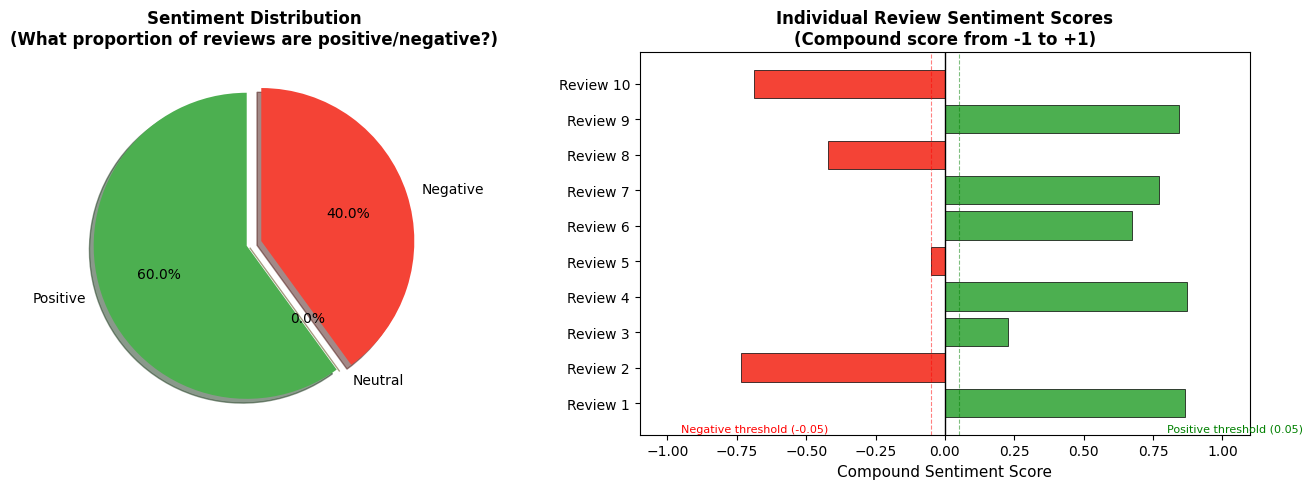


💡 Chart saved as 'sentiment_analysis_results.png'


In [18]:
# Visualization of sentiment analysis results
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ============================================
# LEFT PLOT: Pie Chart - Sentiment Distribution
# ============================================
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive, neutral, negative]
colors = ['#4CAF50', '#FFC107', '#F44336']  # Green, Yellow, Red
explode = (0.05, 0, 0.05)  # Slightly separate positive and negative

wedges, texts, autotexts = axes[0].pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True
)
axes[0].set_title('Sentiment Distribution\n(What proportion of reviews are positive/negative?)', 
                   fontsize=12, fontweight='bold')

# ============================================
# RIGHT PLOT: Horizontal Bar Chart - Individual Scores
# ============================================
compounds = [r['compound'] for r in results]
bar_colors = ['#4CAF50' if c >= 0.05 else '#F44336' if c <= -0.05 else '#9E9E9E' 
              for c in compounds]

y_positions = range(len(compounds))
bars = axes[1].barh(y_positions, compounds, color=bar_colors, edgecolor='black', linewidth=0.5)

# Customize the bar chart
axes[1].set_yticks(y_positions)
axes[1].set_yticklabels([f"Review {i+1}" for i in range(len(compounds))])
axes[1].set_xlabel('Compound Sentiment Score', fontsize=11)
axes[1].set_title('Individual Review Sentiment Scores\n(Compound score from -1 to +1)', 
                   fontsize=12, fontweight='bold')

# Add vertical line at 0 and threshold lines
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1].axvline(x=0.05, color='green', linestyle='--', linewidth=0.8, alpha=0.5)
axes[1].axvline(x=-0.05, color='red', linestyle='--', linewidth=0.8, alpha=0.5)

# Add legend
axes[1].text(0.8, -0.8, 'Positive threshold (0.05)', fontsize=8, color='green')
axes[1].text(-0.95, -0.8, 'Negative threshold (-0.05)', fontsize=8, color='red')

# Set x-axis limits
axes[1].set_xlim(-1.1, 1.1)

plt.tight_layout()
plt.savefig('sentiment_analysis_results.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Chart saved as 'sentiment_analysis_results.png'")

## Summary & Key Takeaways

### Method Comparison

| Feature | VADER | SentiWordNet |
|---------|-------|--------------|
| **Best For** | Social media, reviews, informal text | Formal text, academic papers |
| **Speed** | ⚡ Very Fast | 🐢 Medium (requires POS tagging) |
| **Handles Emojis** | ✅ Yes | ❌ No |
| **Handles Caps/Punctuation** | ✅ Yes | ❌ No |
| **Handles Negation** | ✅ Built-in | ❌ Manual handling needed |
| **Training Required** | ❌ No | ❌ No |
| **Granularity** | Document/sentence level | Word-sense level |

### VADER Score Interpretation

```
┌─────────────────────────────────────────────────┐
│  Score Type  │  Range   │  Interpretation       │
├─────────────────────────────────────────────────┤
│  neg         │  0 to 1  │  Negative proportion  │
│  neu         │  0 to 1  │  Neutral proportion   │
│  pos         │  0 to 1  │  Positive proportion  │
│  compound    │  -1 to 1 │  Overall sentiment    │
└─────────────────────────────────────────────────┘

Compound Score Thresholds:
  • compound >= 0.05  →  Positive 😊
  • compound <= -0.05 →  Negative 😞
  • Between           →  Neutral  😐
```

### Quick Reference Code

```python
# VADER - Quick sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
scores = sia.polarity_scores("I love this product!")
print(scores['compound'])  # 0.6696

# SentiWordNet - Word-level sentiment
from nltk.corpus import sentiwordnet as swn
happy = swn.senti_synset('happy.a.01')
print(happy.pos_score())  # 0.875
```

### When to Use What?

| Scenario | Recommended Method |
|----------|-------------------|
| Twitter/Social Media Analysis | VADER |
| Product Reviews | VADER |
| News Articles | SentiWordNet or both |
| Academic Papers | SentiWordNet |
| Real-time Processing | VADER |
| Fine-grained Word Analysis | SentiWordNet |

### Next Steps

1. **Experiment** with your own text data
2. **Combine methods** for more robust analysis
3. **Fine-tune thresholds** based on your domain
4. **Consider ML approaches** (Section 14) for domain-specific applications